In [3]:
from os import path
import sys
sys.path.append("..")

from src.utils import *
from src.neural_style_transfer import *

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import load_img

content = 'https://images.adsttc.com/media/images/5d66/f567/284d/d161/f000/02c9/newsletter/2.jpg?1567028571'
style = 'https://medias.gazette-drouot.com/prod/medias/mediatheque/25336.jpg'

base_image_path = get_file(f"{int(time.time()+4)}", content)
img = load_img(base_image_path)
img_content = tf.keras.preprocessing.image.img_to_array(img)
height, width, _ = img_content.shape

style_reference_image_path = get_file(f"{int(time.time()+3)}", style)
img = load_img(style_reference_image_path)
img_style = tf.keras.preprocessing.image.img_to_array(img)

gen_height = 400
gen_width = int(width * gen_height / height)

content = preprocess_image(img_content, gen_height, gen_width)
style = preprocess_image(img_style, gen_height, gen_width)

409600/406864 [==============================] - 0s 0us/step


In [3]:
vgg = vgg19.VGG19(weights="imagenet", include_top=False)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

## Version classique

In [ ]:
style_layers = [1, 2, 4, 5, 7]
content_layers = [-2, -3, -4]
model = TransferStyle(style_layers, content_layers)
model.fit(100, content, style, 'classic')

## On modifie les layers utilisés dans la loss
### On inverse, les premier pour le content, les derniers pour le style

In [ ]:
style_layers = [-2, -3, -4]
model = TransferStyle(style_layers, content_layers)
model.fit(100, content, style, 'invert_1')

In [ ]:
style_layers = [1, 4, 7, 12]
model = TransferStyle(style_layers, content_layers)
model.fit(100, content, style, 'invert_2')

## On met du bruit à la place du style

In [ ]:
# gauss noise
gauss = buildNoiseImage(gen_width, gen_height, 3)

style_layers = [1, 2, 4, 5, 7]
content_layers = [-2, -3, -4]
model = TransferStyle(style_layers, content_layers)
model.fit(1, gauss, style, 'style_noise')

## On met du bruit à la place du contenu

Epoch [1/1], loss: 45396.32


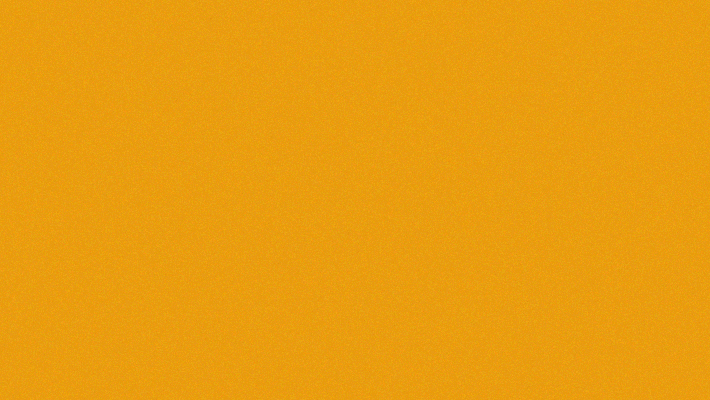

In [4]:
# gauss noise
gauss = buildNoiseImage(gen_width, gen_height, 3)

style_layers = [1, 2, 4, 5, 7]
content_layers = [-2, -3, -4]
model = TransferStyle(style_layers, content_layers)
model.fit(1, content, gauss, 'content_noise')

In [ ]:
## Tentative de recolorisation

122880/122258 [==============================] - 0s 0us/step

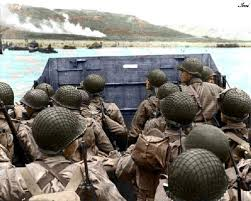

16384/11971 [=========================================] - 0s 0us/step


In [5]:
content ='https://images.immediate.co.uk/production/volatile/sites/7/2019/06/65.-GettyImages-625258854-411e188.jpg?quality=90&resize=768,574'
style = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUWGRgbFhcYGRoaHhodGBsaGh4aGhsaHyggHholHhgaIjEiJSkrLi4uGB8zODMsNygtLisBCgoKDg0OGhAQGi0fHyYtLS0tLS0tNi0rLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS03LS03LS0rK//AABEIAMkA+wMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAFBgMEBwIAAQj/xABLEAACAQIEAwUFBAcGAwUJAAABAhEAAwQSITEFQVEGEyJhcTKBkbHRQqHB8AcUIzNScuEVFjRikrJzwvEXgrPS4yRDRFNjdIOTo//EABgBAAMBAQAAAAAAAAAAAAAAAAABAgME/8QAIhEAAgICAgMBAQEBAAAAAAAAAAECERIhMVEDE0FhInFC/9oADAMBAAIRAxEAPwDarl+BtrVM8TMaKCZjepi+g9BQnG8Ndj4DAPuj8/jUyv4NV9Cf9pALLCNYEGQff8fhX3+17X8UUn49HWEYmVOknaekbiqV5DmmCTG3lU5VyNro0NMfaO1xP9QqW3eVtmB9CD8qyu+2p0I8x9Kgs4pl1kjzDEU8iTX69Wb2+0F3Jla4cvWfF/q+tWeFYouwyYq4SxgKWb75NPJAP9epL4lxDE2CAxYTMEmQY9NqrWu091T4j8iPfRkgH2vUj4XtKxPiYiTy2+gq1/b7cmPvy/SjJAN1epZtdpxzAMaTOvvFS2+1CTDIQOoYGnaAYa9Q5ONWjzI930qccRtxOYAeelFgWq9UNvFI2zKfQipqYHq9Xq9QB6vV6vUAer1er1AHq9Xq9QB6vV6vUAeqHFYgIuYhiJA8Klj4iBMKCY11OwEk1NXqAFX+8dxLl03MNiGtj2O6sMZA1LGSGJysPCF+y250DLhmLKCRBImDuJ5HXcc/Opa9QAMwmIVoFEFiszw/GHgBJYxudvPWi+H4uRlLETzG4+tQporFhHtFg2zgqNCNd68cJFiBblucjUfCpLPaO2d2XTr+d6I4bjNp4AYSfOnpk1Qjvw7lJE+f4VNZ7OqUOZyGB6b+7f30z8R4Gt1hctvlPONj9Ku4WwGTLcAJ2J6+dGIhRbs13lrNbILfaA0EjpQnFcHdWXIpDDcCOXOetaDYwYssWB8JER59ahx+E2uCCBPr8aTiVkwL2jw179Vt+Fny+1m1aT5jcA6bUnWTcLZMuoBkRrpvWt4TFq4BU/Wa9+oW87PlGZhlJ8tfrQ42NSaMkXEPrDfH3VNa4kytO8ba/frTTd7FhrzeIpajwwZM6dfOaX+L9msRbv8Ad20NxSJVhpIG88gQZ09KnEHJ2QXsdnPimD5yP6VKtwgbCDtNDcThrlpgtxWQkaBh9+9fExXIAx1paQbkGbd8gVYtXzIDOY85oIL8Hl8RUn62ORotCwY1XsYpAFtVMc+hneimB44cviAJ6Tr8TSTau6EnSY30qyuJgEaDn+FFv4OPTNDwnEUuaAwehq5WYHFNvA+NXMLxi6oAzsB6/WrUuyWaHXqR17S3JEkEdNfmKM4TtLaYw0qfPUU8kAfr1VbV1bglHBGmxqRnjQa0ZATV6oQTz08q6DU8kBJXqg7/AF2MdakFzSaYHder5NezUAfa9XOavBqAMp4ctw2gxBJIGy6QdogRtUossQZVuf2Tp91BsB2qe1hrahTMBS2bU5XnReRgxRmx2rJa47lVtD2Ax8USYMHWdqxcX0WpFF7TbQ3Lk1Dbhume7G2hiTEU0YftELhGW7ajTmJ8xvuOtCOIcade9NhRP2yo7yPEYICnTeffSTfFCaKFnGYpdAGn1P4V7+2MaDo1wTtEn61T4B2pvpfylc9ssBcbK0AxpqdAdtKe8DxTNb7woADMhoWInXXcRFOUnF0JRFIcdx0a3LnlofpXR7U44CO+YDzVfpTFwXtCuJVjbRQFuFYOUkqIMxPOaIYu6oQz3Yg+LOmkc41++l7B4ifa7WYwD96hnqqg+vs1dw36RMWmj923qvw2ip7Xa7BmYAAUx47cCNtDBnaiXCsfZug92qXIOrKvUz08/uo9gYkOF/Sa2guWQRzKyPrV0fpNsgw1p1+H9KkxeJtqpPcAhRLAWzO/LSNtaW+Ldp7EZbdq3n1zSASscoA1b5Ue1/AxGfFdtMFeQq9p33GVkHPTQgmDSfiDYa4e5lV5Kxkj79am4Lxxb921bW0sw2ci2IYZeZI0Ijl1poGFtRJw66b+FidOmmtDk/qCumKQtJEBhPnHL31GttTz16dI86Z7Kq7HLhioGX2kYA+LXQjfLO1EO4shtbI5R4W3MgcqNdBvsUbNtdi0j1+hq0mGU6h4+Mc/z76YMPhLJuMBh3HmVePQTpV79StEa2vSAw+PnStD2J93CKPtgbctNemteGB5hljrTevDLOb9yDz8WaNvOra4OwBAte7KaLB2IRwTg+0PLWK6XCvtIn89Kcv1XD5iO415e1tMdNKsJg7EEi18ZnrTsihRw6XFPhYj0IH4zRbD8XxKx+0Ugcmj8NaPDBWCBNsj0zffVVsJhncrluAjeMwGmnpTt9CtdkmF7RKfbgHyk/hUWM7Qx+7QOJ/ig/AgV9bgljmHPqTHyqtjOGYddTn8gJP4Usvweuwhh+P2W3kHzG3wqbD8dtM2XNl/m0n0oCMHhV5PrHJtJ06UrYrj1lXK9xiD4iMwLRHUeDXSqUmOjVUxCnUOCPI17vgTE7VktztJbUwti8YOhzN4h1Iy6Vf4Zx5HuZWsXgpgSA536nLTyYqNQVq+G0vSlWxetBssYgb8rgGkc4jn86tA2TrF/wD/AKfSl7Api/8Ao57OZbCti7BW+oZCtzKwjOzBhEiSDE+VXMR+jnh7EyjiZ2duZnTp7qblU18YmetdFHK5NuxK/wCzThw5XP8A9h0+6qeP7BIig4K81q7PiLuzArzEDnMfCtBZ26VwLp6fCpv8NVt6kZof0Z3HVu9xlxm3UKBkDdSDqdvKg+J/Rzjx7F224B0BaAfMhgRWw943T8Kq4zGC0j3XACoCxPkKapkSc4syvs92A4lhrgvWzhww+y5zDXQ7CK1PD4XPaAxFq1nIOZVGZd+RIEiPKsz4f2vxl1v3uXNrGVYE65Qcs/GpLXaDGz4sQ+5GyjbbZdNqrAazbs0H+62C2/VbPl+zFW8DwjD2f3Nm3bJ0OVAJ9ayfiPanF2wWN+6VmNN9940ob/fplb9tfxTLpHdMc0mTrmIEQKF4ypW1RuzWwRBAI6RVFOA4ZSSuGtAneLa6+ulYye2BvEra/XQZ3u3IAHnlaZ9BU/fX2j9tcj+d/wDzVWBCg+za8LgbSezaRfRQKtaeVYJes3A0m47TrBZtI6a/mKks2rk6H4lqn1m1s3fN6VExHOKxBXuCSSBEdflU1uWG6ff8daagTK2bUuJTmy/EVG2Ns87lv/Uv1rEnDg6FZ6/QVxiMPdgQdB0iKXrGuKZtT8Xw4P7+1PTvF+tePHcKN79r/Wv1rHmw7hCQwB6eH519whYyCeW+kUesL6Nf/t3C799bPmCD8qjPaDCD/wB8mv56VlVu/oJfX3fCuMUPCCtwq3XQwfQiKfrHZqF/tHhY0xCAievSNRGu9djtFhQB+1B9A2vwFYTisTj0cqMQo88luNRr9mjfDMXbVRJLPJkk9fKY35ffUyqPJKhZrLdpsL/Gf9DfSof70Ydpys/hOpyH1jXypBTFIw0UqdZMzsY5TpEfGvX8RltvHtSfh1+VEXGQOFGo8Nx1u+guW9V1GogiOUGrWQdKROwnEO7uNaPsXMsTybKPn9KemY0NbJbo+i0OgrsL5VwGroPSYRaO4r0V4Gvs1JroqjauSD5VyZj2a4IPQ/GretnNFOX8s6M/k1wSR6etdBP8pn1FeGGjzpbYJRi6eyI6+dJ36S8eFtrh1aDc8Tz/AArsPe3+2mnil5LFtrlxsqKPyB5k6VifaPtB+sXzcIK54ABM5Qo0Hz95NXGO7Li8vhcwSqmXX7K7QToo+EzXVjitg5g11V8TeEwGGp0I3oRhcVOUg8gPgAKt2MKGZ'
base_image_path = get_file(f"{int(time.time()+4)}", content)
img = load_img(base_image_path)
img_content = tf.keras.preprocessing.image.img_to_array(img)
height, width, _ = img_content.shape

style_reference_image_path = get_file(f"{int(time.time()+3)}", style)
img = load_img(style_reference_image_path)
img_style = tf.keras.preprocessing.image.img_to_array(img)

gen_height = 400
gen_width = int(width * gen_height / height)

content = preprocess_image(img_content, gen_height, gen_width)
style = preprocess_image(img_style, gen_height, gen_width)

In [6]:
style_layers = [1, 2, 4, 5, 7]
content_layers = [-2, -3, -4]
model = TransferStyle(style_layers, content_layers)
model.fit(5000, content, style, 'recolorization')

NameError: name 'TransferStyle' is not defined

565248/558553 [==============================] - 0s 0us/step

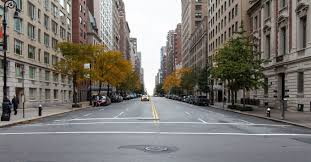

16384/10681 [==============================================] - 0s 0us/step


In [7]:
content = 'https://www.minecraft.net/content/dam/community/fy21/minecraft/heroimages/imgc4_herocities_-081920.png'
style = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUVGR0XGBcYFxoYHRoaGBoaGh4XGBoYICghGBolHhcXIjEhJSkrLi4uGh8zODMsNygtLisBCgoKDg0OGxAQGi0mHSUuLS0tLS0tLS0tMC0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKIBNwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYBBwj/xABIEAACAQIEAwQGBgcGBgEFAAABAhEAAwQSITEFQVETImFxBjKBkaHBQlKSsdHSFCNTYqLh8AczcoKTwhUkQ4Oy8cMWRGNz4v/EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/EACMRAQEAAgIDAAEFAQAAAAAAAAABAhEhMQMSQVEEEyIyYSP/2gAMAwEAAhEDEQA/AKriRwdy9buAlVcXHuBZlsoXulUk6lpOXfKRrrXFAADKiW2lOza0qqfVbPbdB3yF+lnAkjYcpuJ8OtXMVaNllhkYkrqDLINCNOYq247iRZsvcyBmyRsJYkQJI151nrpZfacgMDdz3cNcGgftG9jWkaivSe/ct3UuW2gxBB2YEnQj2VW+hvD2yJcDMVAOVH7xVtUYzpuPLxB3qw9Lvonp/P8AGpl/YxmoteG47t7Z7pRlMEdGU8j9JZFLii91ATr0mJ0Yaf10qqvAjDPBKk3AMw0InEkSD5Ufj8SkWrdxyrPBVtpZYkTsJn76nVXuOcUxD2zb7puWmCqyASZkkMviI2rUejvFLKoVzdy6IRidJOgUztJMDx06VQ3iVe0dzmTU6Awx089amTh7XLJdQCE1ay0QwPe7pP0wRI5HUeIs/MS/imYnAlba3ozLLWcsaoYJDjw0gjwHjXnHDNHUjcGa9LTiiHDC0skOe0RoP1YIadQdRE+Pt804We+k7SKzXbxfWh4pbYo8H1M9t0GxuC4oJHXVWg8waE9B2/5seKt91F3LhllMl7jXLmYaLBbMQRyMuI8jS4TgOxx1sjVLisyz4oSV9hPuitJb+Xo+F1VhEkyF1jvFTHz9sUYlyTMD6Ox0zAmQQdQMo9xqvwglWgEtByx9bI0Dw0mD1HlRi3JJ9WJHM6MpadD1A08xW44ZdvPuJXMt3KJyXVe2BtFyJU9NAPuraf2aY1ytyy2yQR4Ge9t4kVlcUMwaCV3gjkw9aPAoau/7N3AvsFaVdDoWkghgTsAPd8qzG9cPR6VKKRFbYcpUq5QdrlKlQZ/05tThf8LqR8R9xI9tYDDAksAYCqS230vo/CvQvTVgMK0/WX4GfuBrz/CiEcnfKSf8TfgAvtrGTeKg4vxBbY7JzcKuASFywcpkE5juDRvDVBRCCwBiAQs77d3SgeJWVYhmWYgeuq+sY2Zh7TRuDYBVCiBtEg8+o0NYvTc1ujlvi2bS5R2jjs219VB27q0eJDD/ANUJwzLYsWWceuLFtQBs2XKPId4+6pcHhGa4LzsTpnnT62IXIPABxQPbNfZbgByk4d1Q/REOx259f5VazCw4uXEsMxLEXrjEnks3FHsAIAqexiFtPawyKSMpJboF0jxJPzpYm92C2raCe0uFSZ2nM5PwgedUvo7b1sHf9UxJ3lmuMTJ6yTRel6X0Pmf/ACNZH0hupbJzMbjtqtvMYEkyz6wByAEbeZq+4nfZLbld5aNJ1k1iMDgjecsZ37xO5PU9T4VjFrJ3hTnOblzXSBy32Cj6KjX3E1d27DPikUn9UQYTkJAmepMnU61Z8Bwyi7lABUW2YczPqyT5E++o1SMTb/zfKtsWD8YoGKSB9fl+7Vaoy3y50At7nmZnKOp02o7jFxhfVlEsA5A5TlG+0j21JguBhwXuuHuajcaeAA9Xlp99I1lOhno7/fYnWe8PnVDf42ti6RaQM7HvGJO0GNRG39b1c8HUl8WFOU5iAeh72tZnAYMk3ZGXNoGk59Y1B0hY00Htqpe2r4dxpLrZQpDhZbVTHhAOh1NKq/0VwiDMUMico1mAANPn7aVRNEMUq4+xaVVCpbYTmGpcq+3iU+NX/GeHLes5WLACDKkqdD1FZK5ZN3H4W4QJK3IMA/3QhdDvEr/KtpduRbGY9JIB98CaS8YmeNlyZfhVu7buILVxjbLEMHObQCRBPPetJxbI47FmCu4OSfkevhVdwiydSeoIMgg91xpFQ+lGHDuJ+jbYj2EVc5yxhlxysruGK2CHl9FY5RrIbMTp+9rA5CgPSgKwsjcNMe1dDXeF41rVi69xmcI7KBzyrcKASdzAG9F8Vw/aIjqJIhgDpoYnyME1N88t644D8Rxa21t2nUm0VEkalSraGN2Gg8dKJ4jdXs0uZ5QHR5BHe0GvTWJoHjoOaxK/Sg/a+7Wor1xrdnDqihlK962Ro2bs415MCxM0F6uGIsrdQ6hxbZTsUbNBA5MDz5yQeUee8KaHQxMEGDrPhFbW1czdkyKcjAyJAK6yCRz1BFYjhiHOmvMVK6+L60+JupNw2x+qFx0QiCBqQFHhoY8ABRAx6i0gDgXrPeiNckkHcbFZFU91M0OJBUlWXxJWfPbfxpnFbNwfrLU6LDxElWgQJ8fvreN5c/JLqPTcMZRiNwCy+LBHIg8jzHlVgtyWMQASF0zSGBcnfTX/AHeFZr0a4h2uFS4JU5SQD6xKI4lY5yAwq9S8CxgrlLZSBOjDOxMk7HU+TMNa1HPLtk7j99j6upkzEMus+BKyPZRPohxxbd1bt5jAlSdTAcCDrsJigL7wWY/RYhhvMd4MfbpQGDs57VxDz+4giPPUH2Vj66Tp7vSqn9E+I/pGEs3D62XK/wDjTut8VNW1bc3TSrlOqobXKfVZiuN2EzS8lQ0gA7ruJiJould6a3lOGZMy5pUlZExM7b67e2sIuuYT6qkebGcx9mgqJcW1y49zvd/OwEzqWBHPlIG1csx3oOiqVH7x1zN93siudrcmmW45dsh1Fy0ztl0IPIzpqRTlt5lSFyokBVJkjUb/AHeypMYgdttVEkzsNdI2nWlfxS5VI0kKAOuVt48oqfGvq0bE5r1pEkW1aRuMxK4lST1WUEe/pXUcWFtouVrh7G24nYaifcrxUwvJba2G/vH7gA1gDtrgY9ARmFVvDbb3AjsZaLDs3WEafifjSo5hsMSliCTF247E67l+vianwz27Jt4cTmKkjT6K7knpJ+NcxeK7MWktgMHuFCZ20YsfE6RVPwUHNZ70t2Tyza95nY6+/aovSfE4kP2gA9V2HnBqqwNqTdWSBlO2m5WSI5+NE2nCtcRrgZixI5TOugk6yaWAEXLnLuSZ0ESvM1nFe4P9GbeUqOmHP307C2btxxcC5basB1Zhm1M8tth8aXDLipLTmIw7CBtoeZ8/gKA4JxLEZ01zLcYeKoM0HXXXQ6baVtmj/Se5kcsCFIUxJiJhZ+PnrpVJge0AhWcBgDnzFZJ2CqNl8/DQVe+k9sNfVGOjaHTxUxVHZxt58ULMBVhgI5wNyfcaFan0TQh8QDyYfOqD0ywzQuRiBllgNA0RE9a0no0sXcTH1/m1V3pGkof8Hyqwy7L+z5CuHE7lmP3cvZSqf0KH6hJ3JJPvNKjKgv3r1rGYePWgqqnYZyoJ05H5VvHxQS0HuGNsxEkSdNt4k15vfv3TjrHbKyvmUwxVtCw17gA5dOVei42MgBEjOg/jFZ9dSR0y8lzyuV+8mYXDoS1y25huatIny22POh+PWSTnHJGU9NYMk8tqqMHhFz5rLvbMiV20Ku0cwRoOtW/GeKLZKqyFlcNJHLKVGx39b4UvFYmsoFZCMLdnm5I5yDcmQRuK76QZh2LI5RlDQR45BBFG4V7F62yoQQYBgQRG0ioONYeVQk6JoTHUrrp/h6c6b3SyycOYviC9nbS82VriyHGgDAjWfo707iWG7tpgQVtka6QFzWyDpyharuLqMtmY0tmfMMkj76Aw/FWtWltroIjaZnnr4+NYzzmDUm1sn97ZgkFUGoMAg3ApB6jXY1l8ERmXzHOjTxdxcUvqY0MRznlvrQdpFzSCd9vbtrXP9/G9umEkF3bDAhSxgi5LCeeWB/LwqfCcKuQWt3GzKJAJ31Gmu++3OoLTnLlkkHYk6xoQD1571Z8NxymZ2zJHjDqx+CkVv9/D7UuO+lx6LY2bLKvcezmciQCO65JUcxJ9x9+is3QLjOPVdlV0+qQW70nUgnX3jrWRtYhQ3bqCLwUgMonUqe9lgaz5yK0eDxYZ2uKCJYC4vgM2o5wTBHLSOs9MPLjlxK5Z4Wc1nsXjFF8WnkByyhhEEd3Q9TqWH+GKg4deAktyge/8N6kxyZrh3kZzbJG65YPt1J9h8Krk/uX6aa1pqdPWOB+kmFsWLdt2yFRr3DGYkzqBB8/GtZbuBlDAyCAQfA6ivHeH2Ee3bu5ZdhDAuUzQp7wJ9Xl5161wtpsWj1tof4RW45UTXaVcNVA/E7pSzccCcqkx7PGvHeJYtlGZSAcgMkIRqQvqssdeQ8hFen+knF0SxdVbkXAIAEzOmk+VeTcYIKAgqT2YUidiGUyRtBzCpWsez8C5LEqwJKnWIEmNRGw3PhpXL2JyoxBIkG3b8TJltRHjUHDzuJA7pkjYCNY8K7cu91nOgAhQfqgkSff99c5y65zVVt45QU9YzqepOZSPKQKHWWXQkBYkiCD3j3R+6OZ5nwAqJiWLAadTzE5u6P3t5PIabzReIs9nYXYEldPAuY+EVWVhhcKz4gudlcyT0BxC5R5ZxT7uOH6u3YMKrWRnEEMjToPYg18dK5cx7NeVFGVA5B6sYvgz4SimosBgTkQx6q2iB4op0Pv+FYt12qC0gFqydAEuOxG0yX26kk0PeTCJbQFQxaB3fW11kgc9flXMbfzqAp2MQpYciSdOe42G/Os/cVgBlkRuxPTl/XOufvtnK6Wlq5bthgiPG8kGR/inWm28aqkF7eZTByjcnQjXnA5bffUD37rWy3LbcTrPsO2wpyXiog2icgzNrqQRlMmTIAOwFXG8rLw0mEe3culrRXIbTjKNDodSRyGtVeGvOmNtWQALQOkbnuk6+/lRfo7cDXMyrlBsE+ctMjwptwRi7TfvN/4n8K6lWfEDOLt6T3X9nd3qjtLGMtnqrfLn7fhVrim/5u2Z5P7dDp/XSq7/AO7t/wCFv9tWGXxf+jp/WYnl3/m1Acd/uz/g+VGejwPaYnn3zPvaguN/3R/wH7qQyEeh4/UJ7a5T/RcFcMjSq76v58tfka5RlWYjh9v9Lw0N2ufMVfMP+mucCVHXw99afiVktbgwpzKx3MQ4bkJ5dK8yxeNjEoSgTISCbcoWkbyNjryrc4T9JW12gudwAkrdUNAWeaGeW8GllvKzSs9FMDftuVuAlcwOYd4Rku/SExqfjR/pdjBaa2xXMCrrHmbeutNscZVjNy0TyzWXDgezRh5a0Rjnw2KyguMw2Vs1tuWwMdByNZ5NcaCYbTCXisiSTI0OuUz/ABUdxTHtYFpQmcEENqZ7uUTPXXemvgCti5bUEZhInXkojQfu9OdB+k5Y9iy5ozGYB2JXep9XqLPE3rV20pZghdSyhonx02PlVN6Q8PIw4bQLbkrvOUwZOvgKkxVkPbsyNrRP/hQo4iUsW0RpOuYN3gQeRnX3VjLU7qzlmZIIkP7RG3jXbVwyDBA8oq5uspYEgy0GBJ1O4J3O4PzoFsOYgMCT0056z4fjXmyykamNce7qcqkaaxRHDW70baE6xyqHD4N5MSSByE/0KfddgGzKyun7sHl5daxqZcabXFq7oJZTpm0EcjofKAfGatDxsBgbYCzoZM7Tpr8/DpNZO9iDOm5kk+MfyNOMyAZkbx/W9Y9s5/W6b1PrR3MUpPe8SDPUAGPCgzpaeJ5ctCP6+6qtLoDSTy2nXprVjZhlYCO8InSuni89wy/6ZcFw9p/GNPwHD5rFkoJIuBiCeR7rAz4SY6gV6L6OcY7TLZyRktjWZnLArzLgzhcMwOuUEnXfTnJ02rVf2dYnNebbRSQANgSDHsM19LDKZTceTPGx6FSFcmkDW2Hl/FVGXEjOAQzNBMk7TlneM1YziV0DMgEgaaAanMJk7hdIA8qufSTEBsS56ZgJJmQSCY2HLes+CGuQZhioIJiQXXnyEc+tTLtvDqCsC42YZe6SQOW3dB61DxHMyEkwzRA6JJiB7RHlNTYW3GYhZVBrrI10Ak6nWonYrLMQXMGOgnSfw8K5x0zR4O2LSyQC0AhemrkE+8+6hsfcY2wxMyw1Pg5qeysKWuc405nVz7Nx7qF4liS1qY0EQNeRPTWjK+vWFR5LwzMT4gTcbTpoW1PSqDiGMJgrMQv0idY172mYbDapsLgXdnW2M0949cpLidx1mSedVWKzLIdgMoGgYA7Hxk7+yuGe7S3hDbvgH6Syf69mtQYgMZAedCfb5+UV0pnEoxGYa5jJ2Ogjl/XKhuxcRJGUc/WnTmB40kjmks32XSYWfVG3ITvB2NWVnFMGaGU5k1JE7FdO7ttv4UCySVhTodFOk66gaQAZmKIweJVbmYgzrlBYaxpMnfSfhWp3tYvPR/EsbkKg/uSAW0BUH1hA66RU2JH/ADFqN8zf+Jqu4XxN+0hbff7PLqC3dJzEwuuw+HuNwt25duhlslsmwlQNe7mIJ8dprpKuxbLGJtzEFX1kGIB1n4e2hLbqcSpXvBVYHLrBMdKG9KeH3GdchLatm70KBpGk6LvpUvo+6Ye2wYrmLSAgLAct1B+VaW8tHw/DDvQmYu7MC3dEE6cpkA9Iqnxy4hmKZgoXujIsaR1Mn3RRP/1YigKqkkaan5LmPvih/wDi2Jf+7QjxChd/Fpn4UGm4bhQiLpLZRLHU7cydaVZR+H4i5/eMv+di/wAGJHupU2mlFxrh7JirUwRczHu9AB1r0VLOfCuk6MjgjTTMDtHPWsl6SJlx2FTLHrTlaZzDxAg1tbNr9XGQyAdwp9ogmr8SMLjuBrbLvmnMQRmMRnLbERtI91X3HsIDh1KgTImVDAiD1kdNqF43aR4BuLmQr3SGU6EH6QAOlX3EMPmtBUIaIgArtHKKnw3df6zHDcHeyO6ubeVcwCMYOgMZXlefSu3+JX0tq90WyrRBIyMDvqVkTp0FaDC4UraIZdcv0t/VXw8KreKoDaUEfSHPTn41Fl4A4riFu7bBgrvlJl1JJ1UumoH8qANyEG2UHQZtRpJ0HLx8RVlxXBg4a2AQMpkabSNxQOI4ey4VW1Z+0glu8Y1Ea9PCuOWG3SZRA93tGGXQLEmdjprr4zQGIvKDAbUGCPGfbRz2XshIMG5Mgju+EZpMweoqmsITedTEqcukciRvXPLxzutS/Gt9FeOdhnME5oAiBET186G4neF29fuhtbjK0TMdy2CJ0n1W+FVvCrSAkXQw108uYga66CRtUt+4vaMbY7uaV1JEQNO8AdzzFc8ssvTUu4s/tuzkFiQ0rERoD/XTlRVrE6kFZadzy85305U2+rNBQidJ6iDJjrTAq6gHzJ91cbqzl1m5eBD4YHzHPr4eFcwpg7n+vlQ+YjrHT+txRd6/3dT4f10NZuN6a3O17hcXltvBA0+tljxA5natF/Z9xLs7jOVmcqnX6x9bz/GvOlxMgamdDHLzPU1qPRK+cwgxLqDznX3ct/Ovd+lvrPR5vL/Ll7xUGOxQtW2uMCQgkgan2URWY9L8cwazZGzOjMZOozEZSOY2Psr2ODyri13Nedo3zHUgGCSQY5mDt+FVOHuAXASTtPmQ6kD4T5iicc5e7OdmERmYEctj5fhTFQKdG10JnwPX5Vw8/mxwv+u/i8dykrR8RxlsIVRQCRpoBABnT2k6eNZkOFkyGJPnrM7e3nRHGsQgXMTJY9c0DXQkzE1mHu767/z/ABrhjl5MudtZ+mPGhlzFHU8iNzzgt023qHiPEAQltYBkanac0+wak0It6JkaRz25/jQTvLbjUjbz516Y89rScPx+Qkr3gy5CT9LXdQpECYNC4i+CWfKEU6kLtoADBM7777muXcIALa2+8QCWIOkyTCqdduceNC4kvlzMk22zKjTILCOh5eIrlljbTd0jOI10LjmDA0HiY126867bbTQCTruQT0gTEUBcuNI7pAI8ToDuCdxIpXWuCA2fUSBrqDpm8tKvoizu3+zUEnkBE6bchvU6w4BVlDkjKDOx0PI1SuBqyggT6paZ25xudaNwqWuyuZ7hW4ASikwJBmNBqTyqzGQXVjEXsM5ClWYgAqO+pAOglZM7iNAKNbH4kjuW1tA89AR7WJn3CqXBYO6QGslnP7swpB0BOxEA+dXHD+L3bwIUWwyQGLCInpO+x2reLUVGMtXi+XtCdJJ9bXfusST91EYHhrTDAPm3L7gDoTtRnF8NeKkm7rG6CBqdpHOqX0TwzviLiMzEKonvHmR18Ca0rZ2ks292toPBZP2tvhTjx22DCgsNO8SoBjnp+FSWsBZXUJbB8Wk+6Kx/GLSnFbAQw2050StZa4ixP6vDe2J+YNKrFVYj/qE/5B+BpUVR+l2Ksrj8EW7oXOXJkQpEKduoNbGxirZUOrnIRObWI694VhPTnD/89h51zLExtDHf3/Ctfbsk4QLI1QgCNyQQANd618QBxI4dg11bys8DTOp6DYeFW+NCMsO1sg6CY5yNJNeT8PwasM7AkkwoAmTBPLyNeg8dwwu4dRAIkEewED4VmVbNJsFgFtqVBB31DEaeVCYmy+UhGaRtmytPnnmoeE8LW2rQolkg+4UHxDCRh7aqSsMNVYg89DHnRFo1lzZg5WYCYK6ExsMpEa86Zew5NjvIJ9bKrFSNJgEgyZ5VWY43LeBJW4+YMO9mJOrDTXlrR+H7Xsrf6wk5pYmCSNYXXQb/AAoofGLpaZlYawF0bVtp1091Y8hrd+6BOXOw18D1/wA1azF3b4t2e/mZ2hiVXaCdAI6Vnb2JBuXky/8AUzBhy1ClfePgazZLNLjdXYVg25O0n2ZY++rPgeFYFyw+kpieoTQg+FVpuHs80/RmIH1QeXtp/ALfahy90oSw1zKomBp3tzV9Mdcrc78WGKszeRcpgW2MCRsdBI5yRTcZhgLiqqkHIxmJBCkCNPP4jeh7Vm12r5rrsFAAKsNdSTBggiMo86E4mUS6ADdI7ORLAmWYARpqulT9rCp75QZiGKlQe6SCQSJ5T7tvfQIxbEmdjziNKO4gXu9n3BlUkEgkbhdSfq7a+Bqt4fDFRESWGrDcagfcOm1c5+nmPS3yWjkGo1/ltvV5gcd2TIYBBKxyjXcTVfc4FfIBVCMxiGmAentiPb40DgsJiLhAVc0QcqFWOpygZFOaZ6CrPDlLKz+5NWPqnDNmRW6gH4V5z/alxcYe/ZaJIUGOWjEwdZrS+hXFS9nLdXs3BMBtJACyRMTrPlqOVeU/2pO17FOU1VXK5ipy7bZvACYrtaypcHiCy58u+gjnGk+yKZib4USSIOusTtrHvqr4VdulisEwNpnKNdYnQaToIp/F8LeZjlRjlHTeAJIHSTXly/T3LO3J2nm9cJIk4rjQVUKRl5wQD01FVZuBjEwBULOysQwAGkzA5+MdKJvBWM2lzSBosnmfq77V0x8XrNRjLP2u6mGAY2XcaARE6b84PKqlGiCQo1Guvy22rR2rLPbVQ2UdANSDm3nlIFVVzgblFdSsGJU6ZSWCxArrI52Ljg+EL4lXzIQbbkGdIJMawJ1uD49KKxnCrme0pFs2hAaJLTAJgHTcVR4JWS92LMRCupI02J0M7juinYbi1wYtLeYlO7ofFAxHvNXUUuIcQypZyqR2auM0cn0iqPE32aNfVAUeQ0jyq/v2i6WO0+ktwEHcMEJEnfRoofgvDke4oOo7MXCPHMVKn3VnS1Ui2QO9oJjUmOe59lG4ZXCsQMyiZB1AHWtJxDhdqSigIGtSQOZzjUeOx9lE2sBbFoa7rlMsBInQHXUiNKlm+D1VqPeW2GR+4gEbZO9yjnB0gzE1F6P4kgXQkrceAD3YU97Uk7jWtBhcPbRBAUSBIBWNtZEGq30bwxQ3SRExGpGgnoD1FJNJpZ8UMrq3+XMx576xWf8ARpV/TL+afVWIE692rTFC52jTcVkj1YMrqNMx1P8AOqLhiE4u/ludnostAOmmne9/sra16J3v3/4B1rD8Z1xR39cffWxw1kBFBIbujvmySW09bTTXf21ncdw0NeNwOmXNOmm3hy8qDTArsez8zcJ+8UqmV9PWMeFtvwpVFZT03xL/AKZbNmJtqp0IWGzEwQfZQvH/AEnY2LCoApLN2sQYZGEAEbAzPuHWqr0xL/pbZ9WKqTpE6Rz8vGoMmfBO4AkOuYKuvd3YkCNjNdJJrljdaT0KxICl30W2zEk8hkJn41q7FljZTMCDA2CsfaCR99ZrhuBZMEe8jA2mMgtzUnTu671pchIHfA0GgBP3xXO9tmWxAI1PiQigctAGNDYhAUURzHNQdOu4iouKrcs2rl1XDZFLAMhiV1g67U3haNiba33GVrgzQsKNeYXWAelXURPdso1kow0J2za7zvlP3VKtxAgEgQRpObn1gfdUicOPUHzg/KuLwwjb4Ej51OFV+IIZVEaodNZnTqB4nTwrIDD3O1ugW21YmMv0S4IOvLfWt5jLDoJYqB+8wH371lF4CqkH9IuM2h0SfZJIFNmgg4PeNvLCg5Y1YfI1UDBZC3aMoFplmJIJI021I3HhNbuw+VAgQ6cz4mdQv40FiOC27kyhGYgvlEZoMiS0nfxqz2LpHgMbbW/Zvu5tC2gRXgZSUzDWGDMdhkI233qu4xi1xBvXRDEkm2QuQlgANF6Nrp1q1teiVlvWDbkyzmZbfRR4Dwqw4d6P2rZlbYnqxLH4nT2V01azbj8jH8NvYtQFW1ciVPqx6skCNon+hrVz/wAFxFx1vB0ssABoqlpA9eQfW2HPatdbwR6CjcNg9RMDxppnbOYD0cY/3l+9cLRID5FJ01gAmdOvSrfDcE7DK+Gs2u0BOrknQqwO41ILA+z2VcIAtOS5JpZuaSXV2F4M2LzKMQLLKCxzCM8tlGXRQMsAnr58rS7g7JJmxbJ6lFPxinyQKnxWhnkf6+4rWOMctflre5tQYz0ewrqVFlEnmgCH3qJjw2rO4v0MILG3fYZjJDgN/lBUKQNuugrckTUbpW9M7eX430bxcjMLd6NcykZyRECHPLoTQ3E8Q6M4dbiB2zsboOpk5Zy90kEjRY516jftKeVB3MN/6Ike6ro3t5JexiNbKmPWMjUeBIM7aETVZZYKVcKndIjvcxrtOor1LiHovYuTmtLJ3Kyp/hiqW96EWROSdRBGYjToZ/GpqrtnsJed8QHAGZlcxB0LSI8tZqP/AITiFv8Aa9mYUAzpyWK0ycINohjbUkCAzLDREQGWOXnXcRiGykZSJBGhzb+cVnTW1NYW/ksl1Zyq3BMHYqVAJ51DwDEZWV8kjs8k8tLjc43ovjLO8dldFvKPV7yAk+MRVVhcBi1EoGZeWRswHujryrNDcVxy6zMSRIYoNBoupA89Kdb9JLnZqjKrKIOomdTIOvjUV3iF4tJQlgMutsnnOxFS4O6HJF2wvmLeShte8K4m15X7qqEGgGaIjbRvDpT+HYq1LC1E/SyZ9NTofjVdbtKJySoPKJ+JqSxgFRHZb9tLpIy2mVs10SczAjQR+O1FF3rK5y4RVcjUkmWn/wBD3VX8KsWe0cXbAuM5XLLlQmmXUQQw5zpzonDB5lxPXKfumhlU9qIEaLJgmIJ1MUhWysYhFAQQqqIC9o0ADSBAiKacDZJPdB15MTMzzoa07gTmZvEBSPdE1lOL3C98AoVJuhmfKRpCrE8xpMVIXhusXiltIbj5gixMMTuY2B6mlVVx5lNhwCjExoqifWB61ytTX1WV43xBXxN4uuaCbYkkep3Z0noffWs9GOEJdwJQkqt0sTlgGCxidOgA8qKxGK4bJK4YXSTJItLqTqSSRUlji94qFw+FS2q6DMRAHgNIpvhJFnc4cBYNq2sxbKKP8uUCaPs2iFEgCAJmBVE4xrkTiAg+qoUDylTJqO5wLOQbt4MRrqpOvnJNT+X4OPysOPPZuWblk3kGdSsrLkT4LQ2A4mliyllEe4UUDMYQHxiSfhTrfB7IEFx7FI++a6OG2gdGMe/8Ksxv09p8R3eP3T6qInszn3sflUBxN+5oS58myj3IBVlZtWkMgt4d2PuaiziF0lrh89fvY1fSM+1UdjhrT6uvQD+W9WNvgdwiRbf2qR8In4VPdxC9bm+sNHyrtvs/qv8AbH5a3pnblnhTj1rTH+Ee3T8KkPDn+oB5FR95k05Tb+o32h+WpVdPqH7X4AUDLfD36L9tPxqZcA37n20/GnJeUfQHvb8aeMT+4vvb81BKmBgTmQn6udfiZ+74V27bdtyngM6wB0AB0qIXx9Rfe35qcLw+ovvb81ERnDH6yfa/CuW0UHW7anpnA++pe3/cX3v+al2vVF97fmoJlvJ+2tf6i/jRGJxlpkP623mhTo4OolSB4wFoIXlH/TT+L8ak/TFj1E0BGx2PjNYzx3prG6OV/GuNdHWhhiF521/j/NXTil/Zr/H+atspDdFRvc0gnTl4eR3HlTTiR+zT+P8ANXGvr+zT3v8AmoGWxmMDUmuXFAMEeYPLzpxZP2a+xm/GpXxilcrWw0bEsZHgG3jwMiqA2sCNtPCh7mDttuo9mh+FGNeT6h+2Py0HfS0xnLcB8LoH+yoqrxPBByB+H41VXuBQZCHN1Gh9hGtahb6JuLpHjcU/7BUlu5h22Vp33HyAoMacPcXTOfJob35wT8ajFphultvYy/EEj4Vums2zA1I6GG92Y6eyKAxGAsxoLs+Cgj3Fp+NZ9Y17Vk+2UetZceKkMPvB+FB3crXEYXFCKdUdmTWGEw4AnvcvGtUcCn/5R/2h+eh7/D7exY/5rf8AM1PVfYELaxOXTqNR7xQtnILzkspBAiDt4Hxok+j1mZS6EP7vaJ9wqX/h11QIxCuvRwX95KEj3ippdnKbdIpb6ULdLLvatv8A/rdk+Dgg/CnWcXZHrC7b80zD3pP3VNLsTK7At76VSWbdl/VYN5R8RuKVBdfoKbm6nvf5LT+wT9qnuu/koMvSzV0cxosJ+1X3XPyUhat/tR9lvwoPNXQ1UF9lb/afwH5muG1b/aH/AE/50LmpwagnYJ9dv9P/APqni3a/aXP9IfnodWroagKyWvr3P9NR/wDJThbs/XufYUf76Ez09XogtBa+td+wv5qlHY/Wu/YX81BC5TlcUBoFnrd+wv5qcDZ63fsr+agw9PW5QGgWet37K/mp0Wutz7K/moNbtPFygKm11ufYX81dHZfWufYH5qH7Q04XDQTkWvrP/pr+eo2Cci3tWP8AdTc9cz86DvYW/wBof9M/jXBZT9p/Ca4z00tQP7JP2v8AC34UxraftR9l/wAKaTTCaBxsp+1X7L/lpjWU/bL9l/y00mmk0Dv0W3+2tnzFz8lL9ET9tb910f8Ax1GTTTQTfoaftrf8fzSoX4ah/wCra+0w/wBtMJppYUD/ANBcerdtn/uD5xT0tXOZt/61r81Dk00mhpZDCOedv/WtfmqNsC5nvWvPtrR/31XmOlMVFHL76GhFzg1w/wDUs/61v81DPwG5yez/AK1r75p2nSlpRUI4Hf1g2j/3rX5qgucHvc0Q+Vy38moi5aJ2Yj2A/wBe+h2W6Oc+WnwNAM3A7h3sT5MnyNKnXMU43keYrlTRsUT/AFNdRqjgUqqp81LNUAIpxM0EwanA1BFdiiCJroNQKK6KAgRTwagAFPAoicRTgahAFPUCgmBFPFQhaeq+dBI0xpE+NRi0/wBf4RXQtSKniaCP9Gf6/wATUTK43DHyYn50bHjTiPOgrkvrlBzNm1kEmN+RAII8SR5U4YvXfT/EPvJ+VGNbU7/Ko/0ROlUB3MeBPfJIGgCkyekxA99JMcT4Hyov9HXoKQUDQCB5D5UCt3CRqIrrNTGJqNpqCUvTGeoT500zQTZ64WofWuGgmkU0tUJNNJoqctTc1Qk03NQT564XqAnxpuagIL0w77ny0/CaimmzQEZx/RpNcH9Ghia7NBNmFKoBXaCMV1fnSpUD7nyoW4xneu0qQrjOepp6OeppUqByOepopaVKgcpp/KlSoHmpENKlRD22qRTSpUEi0+u0qDq/On9a7SoOGkK7SoGTpTaVKiImpprlKimNUVKlQRsaVKlQRmuNSpUDaa1KlQNNcalSoGGlSpUUjXSKVKgaKVKlRH//2Q=='

base_image_path = get_file(f"{int(time.time()+4)}", content)
img = load_img(base_image_path)
img_content = tf.keras.preprocessing.image.img_to_array(img)
height, width, _ = img_content.shape

style_reference_image_path = get_file(f"{int(time.time()+3)}", style)
img = load_img(style_reference_image_path)
img_style = tf.keras.preprocessing.image.img_to_array(img)

gen_height = 400
gen_width = int(width * gen_height / height)

content = preprocess_image(img_content, gen_height, gen_width)
style = preprocess_image(img_style, gen_height, gen_width)

In [ ]:
style_layers = [1, 2, 4, 5, 7]
content_layers = [-2, -3, -4]
model = TransferStyle(style_layers, content_layers)
model.fit(5000, content, style, 'test')